In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "ozone"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                 sum      mean        max count
month                                          
2021-02  4268.476389  4.346717  17.070000   982
2021-03  5484.444722  4.440846  17.473333  1235

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                               sum      mean        max
repo                                                   
ozone                  5480.000000  4.488124  17.473333
ozone-docker-runner       2.500556  0.312569   0.346944
ozone-docker-builder      1.935556  0.645185   0.654722
ozone-site                0.004444  0.002222   0.002500
ozone-docker-testkrb5     0.004167  0.004167   0.004167

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                          sum      mean        max
repo                  workflowid                                  
ozone                 8247        5479.244444  7.315413  17.473333
ozone-docker-runner   5665410        2.500556  0.312569   0.346944
ozone-docker-builder  6309753        1.935556  0.645185   0.654722
ozone                 582975         0.703611  0.001595   0.003889
                      2340159        0.051944  0.001676   0.002500
ozone-site            3241092        0.004444  0.002222   0.002500
ozone-docker-testkrb5 6903290        0.004167  0.004167   0.004167

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
776519,apache,ozone,631082566,6396,2021-03-08 04:07:44+00:00,2021-03-08 10:21:29+00:00,completed,failure,8247,2021-03-08 04:09:20+00:00,2021-03-08 10:21:24+00:00,True,16,62904,ozone,17.473333,2021-03
775905,apache,ozone,551682230,5843,2021-02-09 14:55:32+00:00,2021-02-09 21:04:30+00:00,completed,failure,8247,2021-02-09 14:55:49+00:00,2021-02-09 21:04:25+00:00,True,16,61452,ozone,17.070000,2021-02
775781,apache,ozone,536396483,5731,2021-02-04 07:31:49+00:00,2021-02-04 12:06:55+00:00,completed,failure,8247,2021-02-04 07:32:28+00:00,2021-02-04 12:06:51+00:00,True,16,49254,ozone,13.681667,2021-02
776376,apache,ozone,613328110,6267,2021-03-02 08:11:25+00:00,2021-03-02 15:41:05+00:00,completed,failure,8247,2021-03-02 08:54:46+00:00,2021-03-02 15:41:00+00:00,True,16,45203,ozone,12.556389,2021-03
776419,apache,ozone,616706424,6305,2021-03-03 07:02:21+00:00,2021-03-03 12:29:09+00:00,completed,failure,8247,2021-03-03 07:03:22+00:00,2021-03-03 12:29:04+00:00,True,16,45150,ozone,12.541667,2021-03
776334,apache,ozone,609910560,6229,2021-03-01 08:51:21+00:00,2021-03-01 14:52:13+00:00,completed,failure,8247,2021-03-01 08:51:42+00:00,2021-03-01 14:52:09+00:00,True,16,44988,ozone,12.496667,2021-03
776397,apache,ozone,614484905,6286,2021-03-02 15:15:10+00:00,2021-03-02 23:42:49+00:00,completed,failure,8247,2021-03-02 17:10:59+00:00,2021-03-02 23:42:45+00:00,True,16,44893,ozone,12.470278,2021-03
776434,apache,ozone,617965540,6319,2021-03-03 15:13:24+00:00,2021-03-03 20:43:50+00:00,completed,failure,8247,2021-03-03 15:13:59+00:00,2021-03-03 20:43:47+00:00,True,16,44545,ozone,12.373611,2021-03
776321,apache,ozone,609142520,6217,2021-03-01 02:50:20+00:00,2021-03-01 08:11:33+00:00,completed,failure,8247,2021-03-01 02:50:31+00:00,2021-03-01 08:11:29+00:00,True,16,44388,ozone,12.330000,2021-03
776384,apache,ozone,613921074,6274,2021-03-02 11:52:29+00:00,2021-03-02 17:27:32+00:00,completed,failure,8247,2021-03-02 11:53:46+00:00,2021-03-02 17:27:27+00:00,True,16,44225,ozone,12.284722,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
26,apache,ozone,integration (ozone),2302.487222
24,apache,ozone,integration (client),1783.876389
1,apache,ozone,acceptance (misc),1656.158056
25,apache,ozone,integration (filesystem-hdds),1640.197222
2,apache,ozone,acceptance (secure),1554.366389
3,apache,ozone,acceptance (unsecure),973.347500
29,apache,ozone,unit,821.483056
27,apache,ozone,kubernetes,301.807500
22,apache,ozone,findbugs,292.545833
19,apache,ozone,compile (11),291.781667


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
3,apache,ozone,success,23333
1,apache,ozone,failure,1973
2,apache,ozone,skipped,1546
0,apache,ozone,cancelled,1082
8,apache,ozone-go,success,38
5,apache,ozone-docker-runner,success,12
4,apache,ozone-docker-builder,success,3
9,apache,ozone-site,success,2
6,apache,ozone-docker-testkrb5,success,1
7,apache,ozone-go,failure,1


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

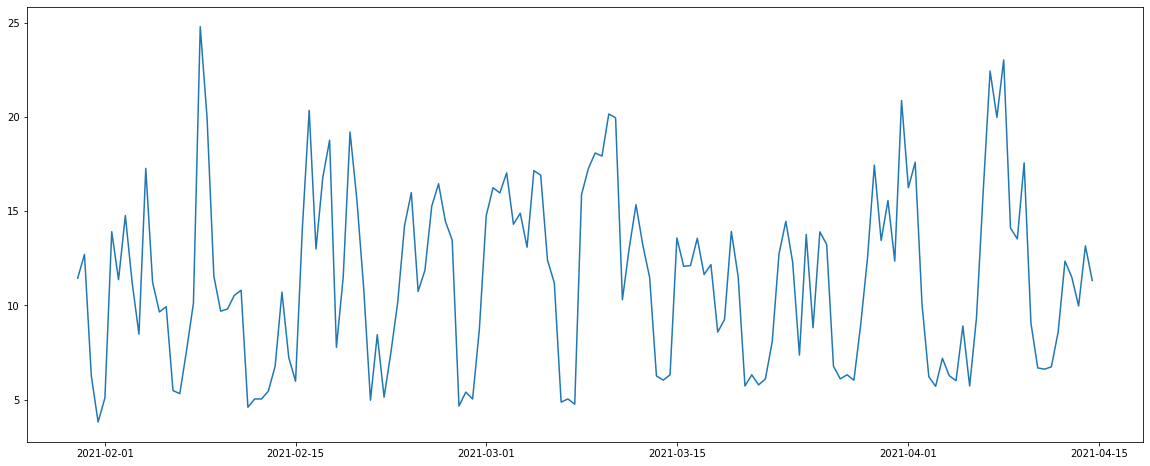

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

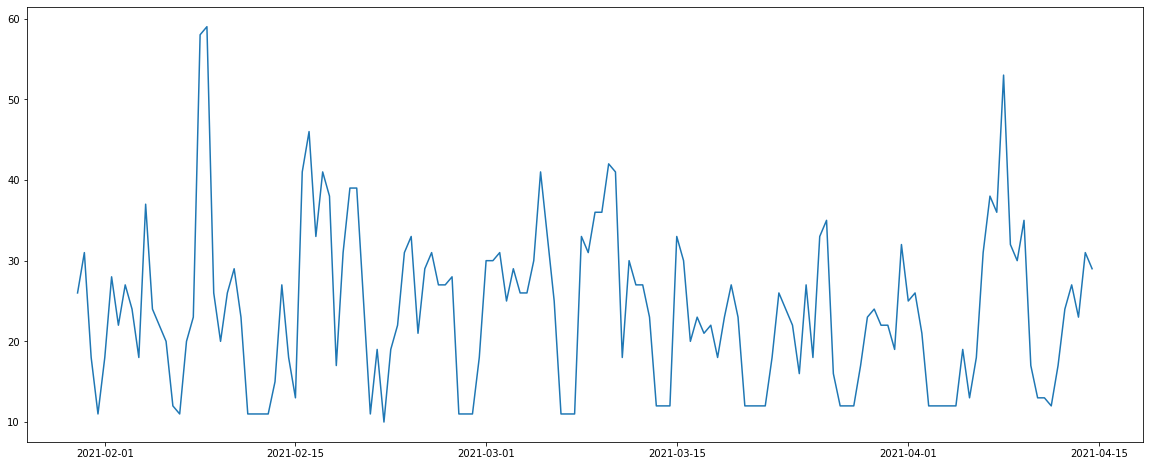

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()